In [11]:
pip install numpy

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

In [3]:
# prepare independent features and dependent features
def prepare_data(timeseries_data, n_features):
    X, y = [], []
    for i in range(len(timeseries_data)):
        end_ix = i + n_features # 0->3, 1->4, 2->5,
        if end_ix > len(timeseries_data) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [4]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [5]:
print(X)
print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


In [6]:
X.shape, y.shape

((6, 3), (6,))

In [7]:
# reshape from [samples, timesptes] into [samples, timesteps, features]
n_features = 1
X = X.reshape(X.shape[0], X.shape[1], n_features)

In [8]:
X.shape

(6, 3, 1)

# Building LSTM Model

In [9]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=300, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
x_input = np.array([187, 196, 210])
temp_input = list(x_input)
lst_output = []
i = 0
while(i<10):
    if (len(temp_input) > 3):
        x_input = np.array(temp_input[1:])
        # print(x_input)
        print("{} day input: {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output: {}".format(i, yhat[0][0]))
        print()
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.append(yhat[0][0])
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        # print(yhat.shape)
        # print(yhat[0][0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i = i + 1


1 day input: [196.         210.         227.44851685]
1 day output: 239.05776977539062

2 day input: [210.         227.44851685 239.05776978]
2 day output: 255.19032287597656

3 day input: [227.44852 239.05777 255.19032]
3 day output: 272.591552734375

4 day input: [239.05777 255.19032 272.59155]
4 day output: 287.30682373046875

5 day input: [255.19032 272.59155 287.30682]
5 day output: 305.5296630859375

6 day input: [272.59155 287.30682 305.52966]
6 day output: 324.22998046875

7 day input: [287.30682 305.52966 324.22998]
7 day output: 342.3323669433594

8 day input: [305.52966 324.22998 342.33237]
8 day output: 363.0018615722656

9 day input: [324.22998 342.33237 363.00186]
9 day output: 384.12884521484375



# Visualizing the output


In [12]:
import matplotlib.pyplot as plt

In [13]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [14]:
lst_output

[np.float32(227.44852),
 np.float32(239.05777),
 np.float32(255.19032),
 np.float32(272.59155),
 np.float32(287.30682),
 np.float32(305.52966),
 np.float32(324.22998),
 np.float32(342.33237),
 np.float32(363.00186),
 np.float32(384.12885)]

In [15]:
day_new = np.arange(1, 10)
day_pred = np.arange(10, 20)

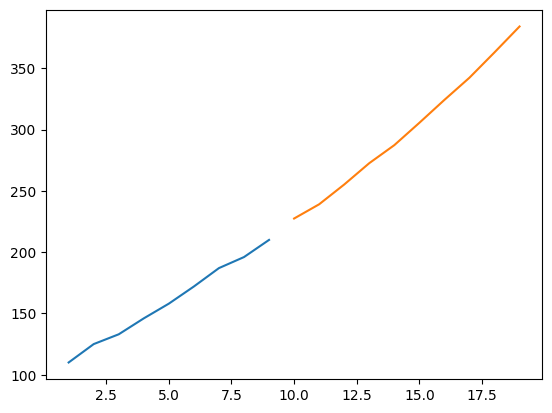

In [16]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, lst_output)